# Varying prediction window

In [2]:
import pandas as pd

# Load the data
data = pd.read_excel("Baseline_PR_IDR_10_BR_0.xlsx")

# Display the first few rows of the data
data.head()
import matplotlib.pyplot as plt
import seaborn as sns

# Remove the top row (header row) and set column names
data.columns = data.iloc[0]
data = data.drop(0)

# Convert columns to appropriate data types
data["Prediction window"] = pd.to_numeric(data["Prediction window"])
data["F1 "] = pd.to_numeric(data["F1 "])
models = data['Model'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(models)))

# Plotting the data using a bar chart
plt.figure(figsize=(12, 7))
sns.barplot(data=data, x="Prediction window", y="F1 ", hue="Model", palette=("viridis"), ci=None)

plt.title("$F1$ Score by Prediction Window for Logistic Regression")
plt.xlabel("Prediction Window")
plt.ylabel("F1 Score")
plt.legend(title="Model Type", loc="upper left")
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('Baseline_PW')
plt.show()




NameError: name 'np' is not defined

In [3]:
data = pd.read_excel("classical_18_PW.xlsx")

# Rename columns based on the first row and drop the first row
data.columns = data.iloc[1].str.strip()
data = data.drop(0)
data = data.drop(1)
data.head()

1,NaN,Model,Prediction window,F1
2,NaN,RF,1,0.05
3,NaN,SVM,1,0
4,NaN,Catboost,1,0.06
5,NaN,XGBoost,1,0.07
6,NaN,RF,2,0.465


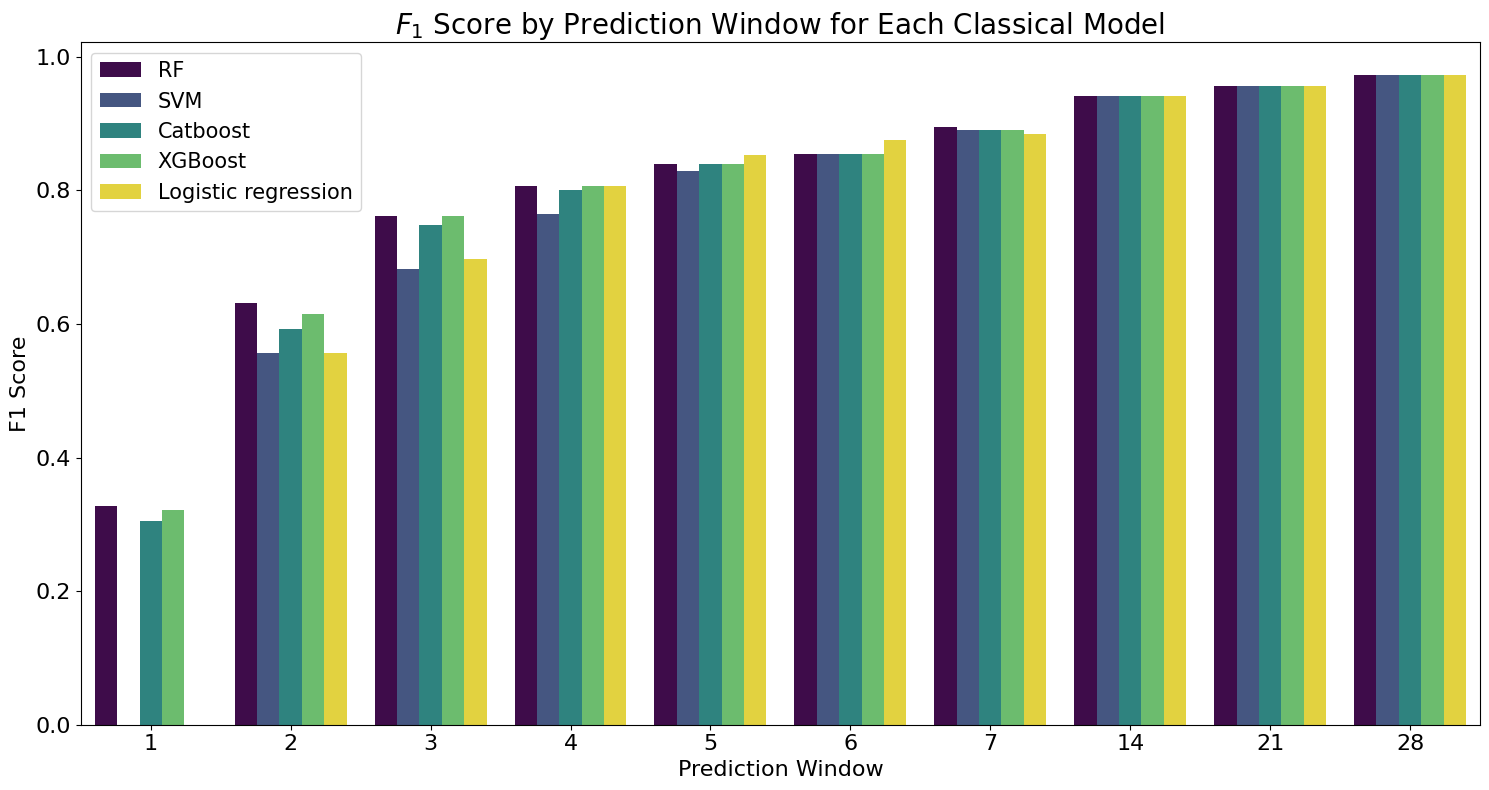

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the provided Excel file
data = pd.read_excel("classical_PR_IDR=10_BR=0.xlsx")

# Rename columns based on the first row and drop the first row
data.columns = data.iloc[0].str.strip()
data = data.drop(0)
# data = data.drop(1)

# Convert 'F1' column to numeric
data['F1'] = pd.to_numeric(data['F1'], errors='coerce')

# Ensure 'Prediction window' is of string type for plotting
data['Prediction window'] = data['Prediction window'].astype(str)

# Generate the colors based on the unique models in the data
models = data['Model'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(models)))

# Create a color mapping for each model
color_map = dict(zip(models, colors))

# Plot
plt.figure(figsize=(15, 8))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.barplot(x="Prediction window", y="F1", hue="Model", data=data, palette=color_map)
plt.title("$F_1$ Score by Prediction Window for Each Classical Model", fontsize=20)
plt.ylabel("F1 Score", fontsize=16)
plt.xlabel("Prediction Window", fontsize=16)
plt.legend(prop = { "size": 15 })
plt.tight_layout()
plt.savefig('classical_PW')
plt.show()


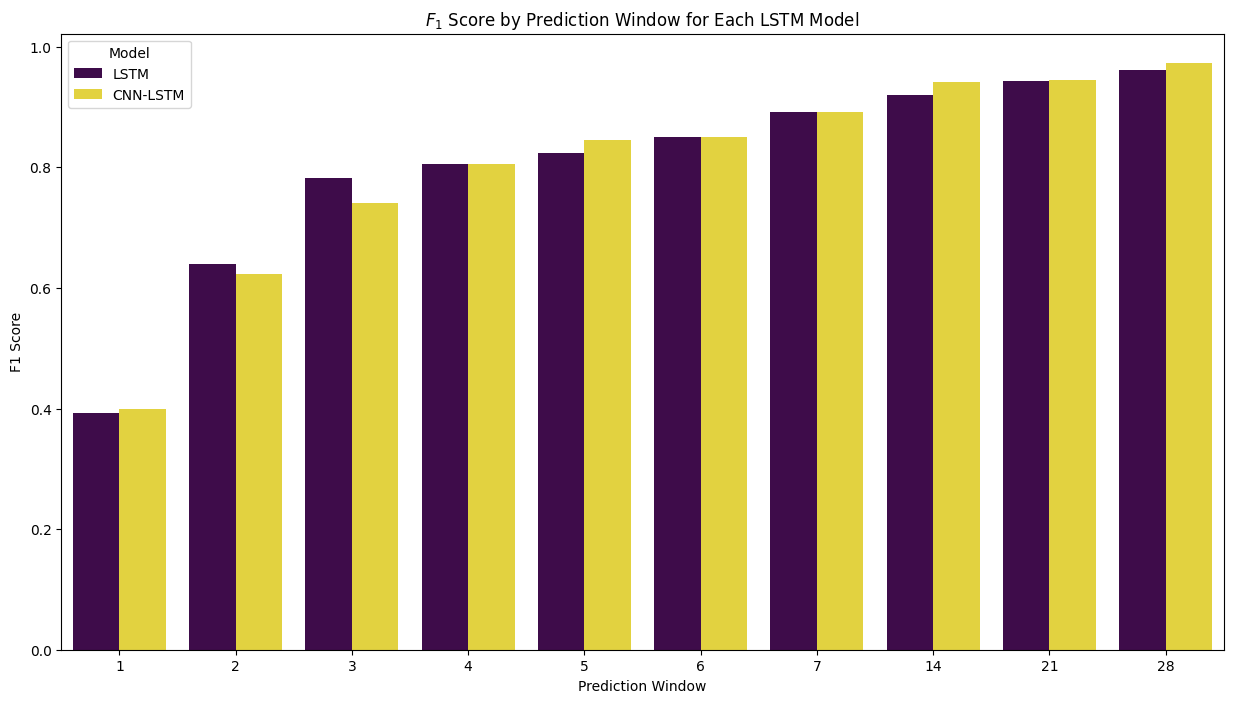

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the new provided Excel file
lstm_data = pd.read_excel("LSTM_PR_IDR_10_BR_0.xlsx")

# Rename columns based on the second row and drop the first two rows
lstm_data.columns = lstm_data.iloc[1].str.strip()
lstm_data = lstm_data.drop([0, 1])

# Convert 'F1' column to numeric
lstm_data['F1'] = pd.to_numeric(lstm_data['F1'], errors='coerce')

# Ensure 'Prediction window' is of string type for plotting
lstm_data['Prediction window'] = lstm_data['Prediction window'].astype(str)

# Generate the colors based on the unique models in the data
models_lstm = lstm_data['Model'].unique()
colors_lstm = plt.cm.viridis(np.linspace(0, 1, len(models_lstm)))

# Create a color mapping for each model
color_map_lstm = dict(zip(models_lstm, colors_lstm))

# Plot
plt.figure(figsize=(15, 8))
sns.barplot(x="Prediction window", y="F1", hue="Model", data=lstm_data, palette=color_map_lstm)
plt.title("$F_1$ Score by Prediction Window for Each LSTM Model")
plt.ylabel("F1 Score")
plt.xlabel("Prediction Window")
plt.savefig('LSTM_PW')
plt.legend(title="Model")




# Varying buffer window 

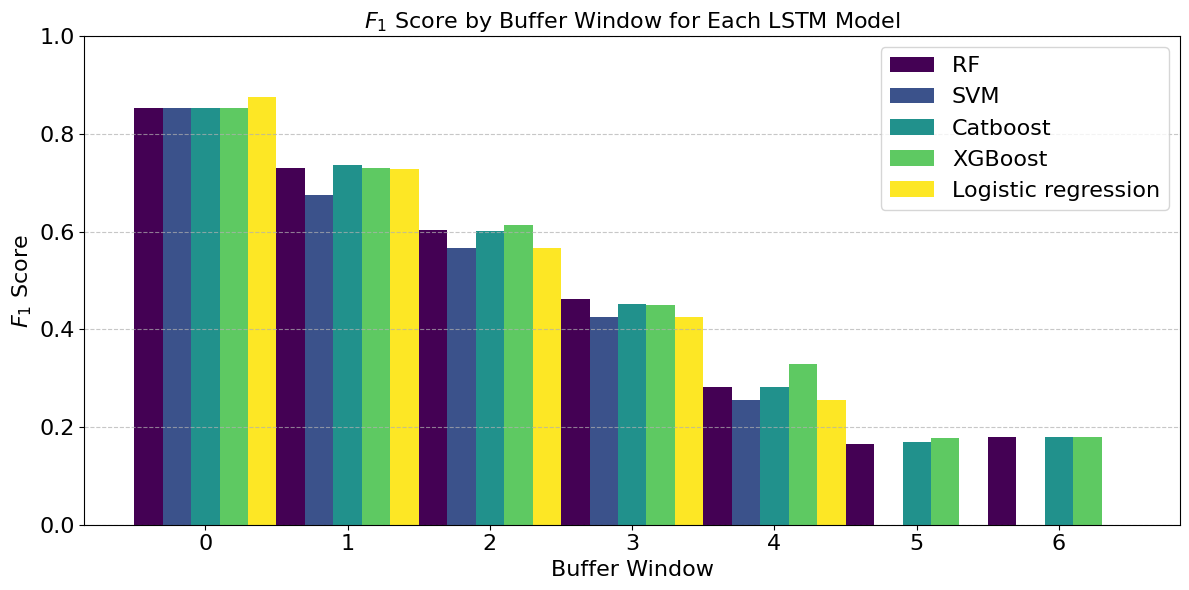

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_excel("classical_BR_PW_6_IDR_10.xlsx")

# Process the data
data_cleaned = data.iloc[1:, 1:4]
data_cleaned.columns = ["Model", "Buffer Window", "F1"]
data_cleaned["F1"] = data_cleaned["F1"].astype(float)
data_cleaned["Buffer Window"] = data_cleaned["Buffer Window"].astype(str)

# Unique buffer windows and models
buffer_windows = data_cleaned["Buffer Window"].unique()
models = data_cleaned["Model"].unique()

# Define bar width
bar_width = 0.2
fontsize_value=16
# Generate distinct colors for each model
colors = plt.cm.viridis(np.linspace(0, 1, len(models)))

# Plotting with models side by side for each buffer window
plt.figure(figsize=(12, 6))

for i, model in enumerate(models):
    subset = data_cleaned[data_cleaned["Model"] == model].sort_values(by="Buffer Window")
    positions = np.arange(len(buffer_windows)) + i * bar_width
    plt.bar(positions, subset["F1"], width=bar_width, label=model, color=colors[i])

plt.xlabel("Buffer Window", fontsize= fontsize_value)
plt.ylabel("$F_1$ Score", fontsize=fontsize_value)
plt.title("$F_1$ Score by Buffer Window for Each LSTM Model", fontsize=fontsize_value)
plt.xticks(
    [x + bar_width * (len(models) / 2 - 0.5) for x in range(len(buffer_windows))], 
    buffer_windows, fontsize=fontsize_value
)
plt.yticks([0,0.2,0.4,0.6,0.8,1], fontsize=fontsize_value)
plt.tight_layout()
plt.legend(fontsize=fontsize_value)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Classical_BR')
plt.show()





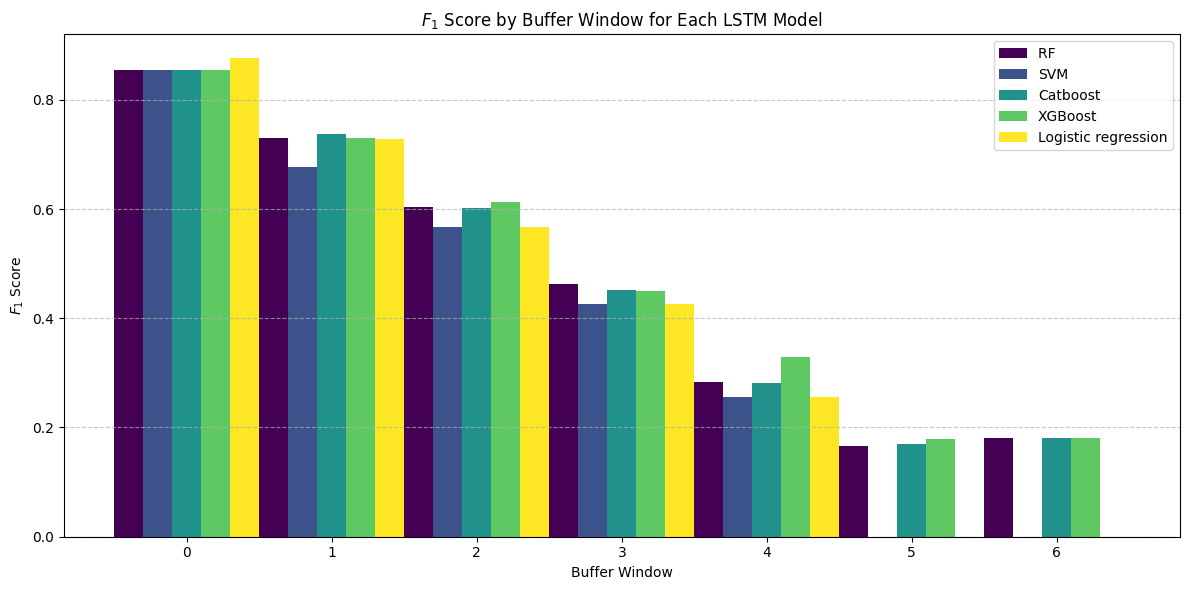

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the LSTM data
data_lstm = pd.read_excel("classical_BR_PW_6_IDR_10.xlsx")

# Process the LSTM data by skipping the extra header row
data_cleaned_lstm = data_lstm.iloc[1:, 1:4]
data_cleaned_lstm.columns = ["Model", "Buffer Window", "F1"]
data_cleaned_lstm["F1"] = data_cleaned_lstm["F1"].astype(float)
data_cleaned_lstm["Buffer Window"] = data_cleaned_lstm["Buffer Window"].astype(str)

# Define unique buffer windows and models for the LSTM data
buffer_windows_lstm = data_cleaned_lstm["Buffer Window"].unique()
models_lstm = data_cleaned_lstm["Model"].unique()

# Define bar width
bar_width = 0.2

# Generate distinct colors for each model in the LSTM data
colors_lstm = plt.cm.viridis(np.linspace(0, 1, len(models_lstm)))

# Plotting with models side by side for each buffer window using the LSTM data
plt.figure(figsize=(12, 6))

for i, model in enumerate(models_lstm):
    subset = data_cleaned_lstm[data_cleaned_lstm["Model"] == model].sort_values(by="Buffer Window")
    positions = np.arange(len(buffer_windows_lstm)) + i * bar_width
    plt.bar(positions, subset["F1"], width=bar_width, label=model, color=colors_lstm[i])

plt.xlabel("Buffer Window")
plt.ylabel("$F_1$ Score")
plt.title("$F_1$ Score by Buffer Window for Each LSTM Model")
plt.xticks(
    [x + bar_width * (len(models_lstm) / 2 - 0.5) for x in range(len(buffer_windows_lstm))], 
    buffer_windows_lstm
)
plt.tight_layout()
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('LSTM_BR')
plt.show()



# Varying Input data region

/var/tmp/ipykernel_5866/197745323.py:15: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pivot_data = data_cleaned.pivot(index="Input data region", columns="Model", values="F1")


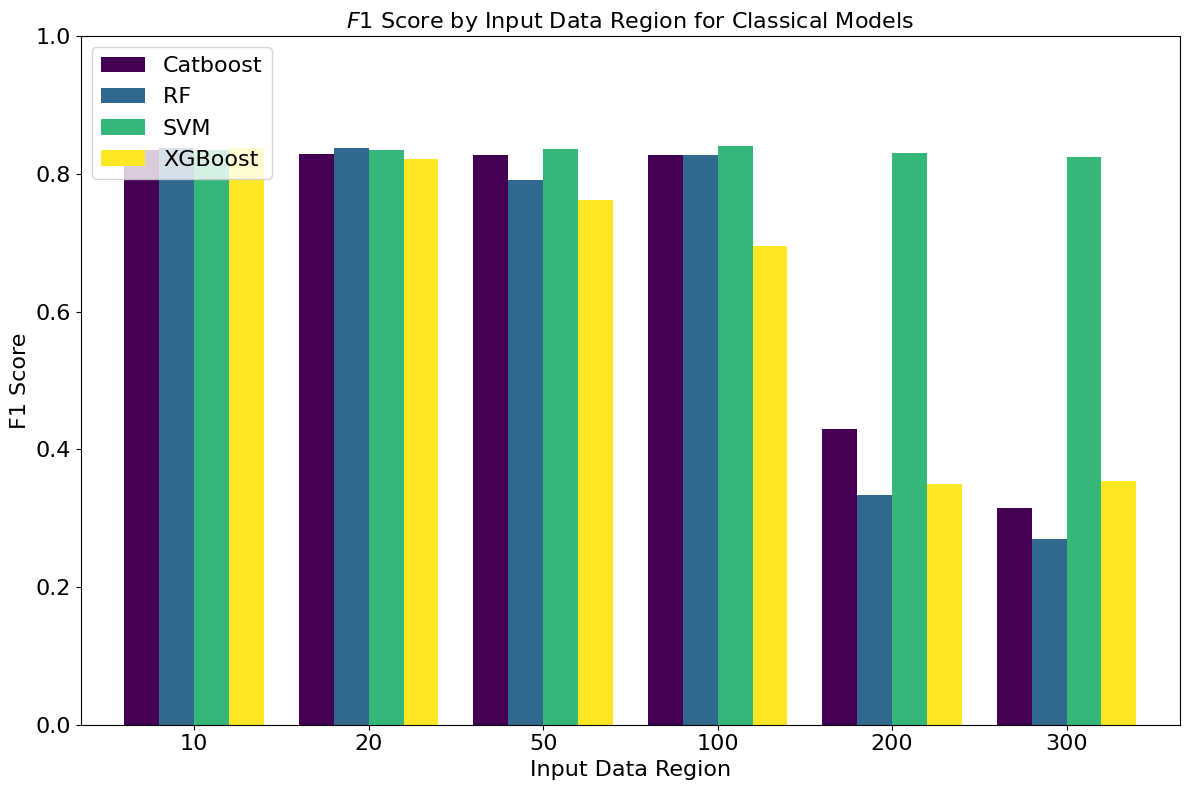

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_excel("classical_18_IDR.xlsx")
fontsize=16
# Clean and prepare the data
data_cleaned = data.iloc[1:]
data_cleaned.columns = ["_", "Model", "Input data region", "F1"]
data_cleaned = data_cleaned.drop(columns=["_"])
data_cleaned["F1"] = data_cleaned["F1"].astype(float)

# Pivot the dataframe for grouped bar plotting
pivot_data = data_cleaned.pivot(index="Input data region", columns="Model", values="F1")

# Define colors
models = data_cleaned["Model"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(models)))

# Plotting
ax = pivot_data.plot(kind='bar', figsize=(12, 8), color=colors, width=0.8)
ax.set_ylabel("F1 Score", fontsize=fontsize)
ax.set_xlabel("Input Data Region", fontsize=fontsize)
ax.set_title("$F1$ Score by Input Data Region for Classical Models", fontsize=fontsize)
plt.xticks(rotation=0, fontsize=fontsize)
plt.yticks([0,0.2,0.4,0.6,0.8,1], fontsize=fontsize)
plt.tight_layout()
plt.legend(loc="upper left", fontsize=fontsize)
plt.savefig('classical_IDR')
plt.show()


/var/tmp/ipykernel_3997/1059728385.py:11: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pivot_data_lstm = data_cleaned_lstm.pivot(index="Input data region", columns="Model", values="F1")


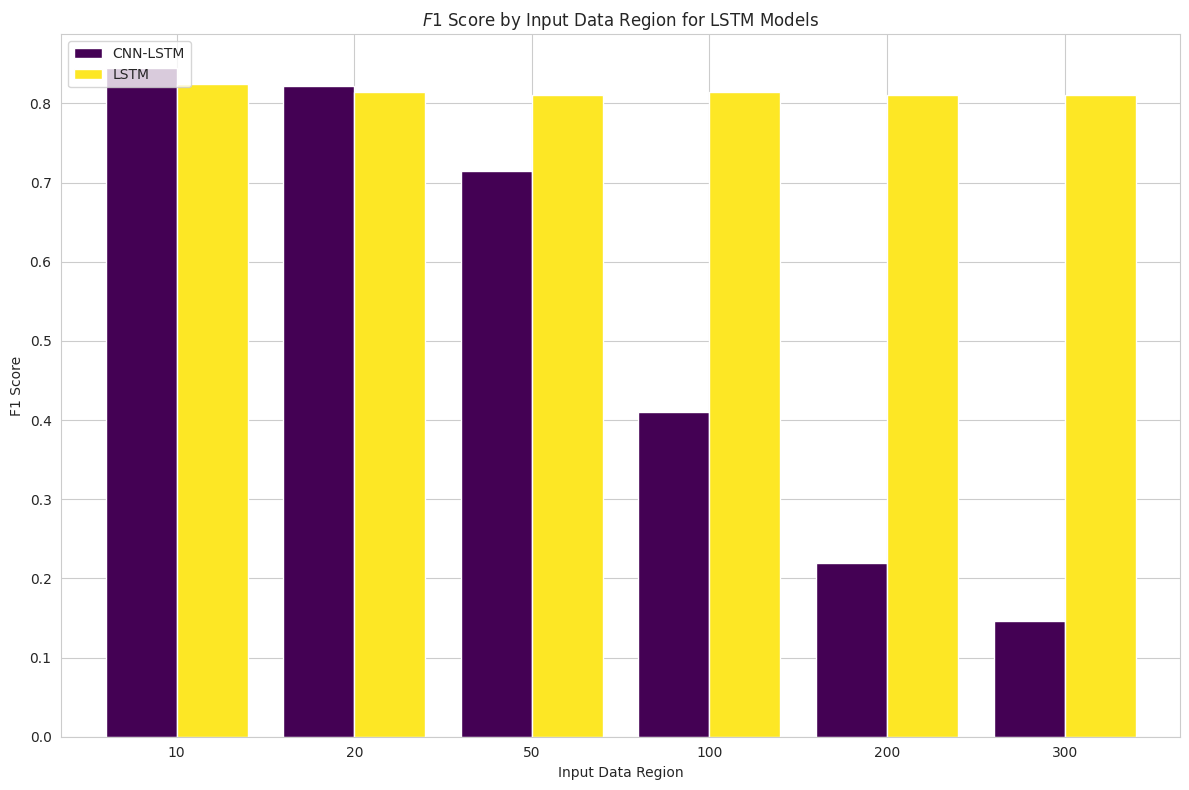

In [75]:
# Load the new data from the provided Excel file
data_lstm = pd.read_excel("LSTM_IDR_PW_5_BR_0.xlsx")

# Clean and prepare the data
data_cleaned_lstm = data_lstm.iloc[2:]
data_cleaned_lstm.columns = ["_", "Model", "Input data region", "F1"]
data_cleaned_lstm = data_cleaned_lstm.drop(columns=["_"])
data_cleaned_lstm["F1"] = data_cleaned_lstm["F1"].astype(float)

# Pivot the dataframe for grouped bar plotting
pivot_data_lstm = data_cleaned_lstm.pivot(index="Input data region", columns="Model", values="F1")

# Define colors for the new data
models_lstm = data_cleaned_lstm["Model"].unique()
colors_lstm = plt.cm.viridis(np.linspace(0, 1, len(models_lstm)))

# Plotting
ax = pivot_data_lstm.plot(kind='bar', figsize=(12, 8), color=colors_lstm, width=0.8)
ax.set_ylabel("F1 Score")
ax.set_xlabel("Input Data Region")
ax.set_title("$F1$ Score by Input Data Region for LSTM Models")
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(loc="upper left")
plt.savefig('LSTM_IDR')
plt.show()
